<div dir = "rtl" style = "font-size: 32px; font-family: Calibri;">
<b>
تمرین کامپیوتری شماره صفر
</b>
</div><br><br>
<div dir = "rtl" style = "font-size: 22px; font-family: Calibri;">
<b>
معین کرمی 810198540
</div>
<hr>

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: green;">
                                                                <b>
                                                                هدف پروژه:
                                                                </b>
                                                                </div>
                                                                <br>
                                                                </div>
                                                                <div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        هدف از انجام این پروژه پر کردن نواقص یک دیتاست به کمک پیش‌بینی آن‌ها به کمک تحلیل آماری است.
    </b>
</div>
    
                                                               

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri;
color: green">
    <b>
        توضیح کلی پروژه:
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        در این پروژه ابتدا با کتابخانه های پایتون آشنا می‌شویم و با استفاده از این کتابخانه ها عملیات هایی مانند برچست زدن داده های غیر عددی، تحلیل داده های دیتاست ، رفع کردن نواقص داده ها، انجام عملیات ها با 
        vectorization
        و مقایسه آن در برابر استفاده از حلقه لوپ,
        رسم توابع و نمودارها، نرممال سازی داده ها و در نهایت  پیش‌بینی مقادیر ستون هدف را با استفاده تحلیل فیچر ها و انتخال بهترین فیچر و استفاده از تابع چگالی احتمال آن انجام می‌دهیم.
    </b>
</div>
   


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: green">
    <b>
        import
        کتابخوانه های مورد نیاز
    </b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import timeit
import scipy.stats as stats

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش ۱
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        ابتدا با استفاده از تابع
        read_csv
        فایل ورودی را خوانده و محتوای آن را داخل یک دیتافریم به نام
        df
        ذخیره می‌کنیم.
        <br>
        این دیتا فریم هم شامل دیتای 
        train
        و هم دیتای 
        test
        است که در ادامه این دو بخش را از هم تشخیص داده و جدا می‌کنیم.
    </b>
</div>

In [2]:
df = pd.read_csv("bank_term_deposit.csv")

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
         تابع 
        $describe()$
        برای مشاهده ی برخی داده های آماری نظیر صدک ها ، میانگین، 
       بیشینه، کمینه
        و تعداد داده های غیر خالی های هر یک از ستون های یک دیتا فریم استفاده می‌شود
    </b>
</div>

In [3]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تابع
        $tail(n)$
        در واقع اطلاعات 
        $n$
        سطر آخر دیتافریم را نشان می‌دهد.
        مقدار پیشفرض 
        $n$
        هم برابر 5 است.
    </b>
</div>

In [4]:
df.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تابع
        $head(n)$
        در واقع اطلاعات 
        $n$
        سطر اول دیتافریم را نشان می‌دهد.
        مقدار پیشفرض 
        $n$
        هم برابر 5 است.
    </b>
</div>

In [5]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تابع
        $info()$
        در واقع اطلاعات 
        کلی دیتافریم مانند تعداد سطرها، تعداد ستون ها، تعداد داده های 
        غیر خالی هر ستون، دیتا تایپ هر ستون و حافظه‌ی اشغال شده توسط دیتافریم را به ما نشان می‌دهد.
        </b>
</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش ۲
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        کاربرد تابع 
        $info()$
        در بخش قبلی ذکر شد.
        <br>
        ستون‌های دسته‌ای:
        job, marital, education, housing, loan, poutcom, y
        <br>
        ستون‌های عددی:
        age, balance, duration, campaign, pdays
        <br>
        <br>
        برای برچسب گذاری داده های دسته ای ستون 
        $marital$
        از تابع 
        $replace$
        استفاده می‌کنیم تا مقادیر عددی را جایگزین مقادیر غیر عددی کنیم.
    </b>
</div>

In [7]:
df['marital'] = df['marital'].replace({'single' : 0, 'married' : 1, 'divorced' : 2})
df['marital']

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
4516    1.0
4517    1.0
4518    1.0
4519    1.0
4520    0.0
Name: marital, Length: 4521, dtype: float64

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش ۳
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
    در ابتدا با استفاده از تابع
        $isna()$
        برای هر فیلد مشخص می‌کنیم که این فیلد خالی است یا نه و سپس با تابع
        $sum()$
        مجموع تعداد خانه های 
        NaN
        را به ازای هر ستون به دست می‌آوریم. 
    </b>
</div>

In [8]:
df.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        حال با استفاده از تابع 
        $fillna()$
        در ستون های عددی به کمک تابع 
        $mean()$
        میانگین ستون را به جای مقادیر 
        Nan
        و در ستون های دسته‌ای به کمک تابع
        $mode()$
        مد ستون را به جای مقادیر 
        NaN
        قرار می‌دهیم.
    </b>
</div>

In [9]:
df['age'].fillna(value = df['age'].mean(), inplace = True)
df['marital'].fillna(value = df['marital'].mode()[0], inplace = True)
df['balance'].fillna(value = df['balance'].mean(), inplace = True)
df['housing'].fillna(value = df['housing'].mode()[0], inplace = True)
df['duration'].fillna(value = df['duration'].mean(), inplace = True)
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,1.0,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,1.0,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,0.0,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,1.0,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,1.0,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        معایب و مزایای استفاده از میانگین
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        مزایا:
            <br>
        این روش ساده، سریع و کم هزینه است.
        <br>
        معایب:
        <br>
        در این روش انحراف معیار و در نتیجه واریانس کاهش می‌یابد و صدک ها نیز تغییر می‌کنند.
        کمتر شدن واریانس نیز منجر به محدود شدن بازه اطمینان در توزیع احتمالاتی و بایاس شدن مدل ما می‌شود.
    </b>
</div>

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        حال با استفاده از تابع 
        $dropna()$
        سطرهایی که مقدار هدف آن ها ۰ است را جدا می‌کنیم. این دیتافریم جدید دیتای 
        test
        و دیتافریم اصلی، دیتای 
        train
        ما است.
                <br>
<!--         ولی قبل از این کار ابتدا یک ستون برای اندیس گذاری به دیتافریم اضافه می‌کنیم تا در انتها تشخیص دهیم اندیس هر یک از ردیف های دیتافریم 
 test
که می‌خواهیم ستون هدف آن را کامل کنیم چه بوده‌است. سپس این ستون را در دیتای 
 train
که ستون هدف آن کامل است حذف می‌کنیم. -->
    </b>
</div>

In [10]:
nan_df = df[df['y'].isnull()]
df.dropna(subset = ['y'], inplace = True)
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.00000,unemployed,1.0,primary,1787.00000,no,no,79.00000,1,-1,unknown,no
1,33.00000,services,1.0,secondary,4789.00000,yes,yes,264.72402,1,339,failure,no
2,41.61747,management,0.0,tertiary,135.00000,yes,no,185.00000,1,330,failure,no
3,30.00000,management,1.0,tertiary,1476.00000,yes,yes,199.00000,4,-1,unknown,no
4,59.00000,blue-collar,1.0,secondary,1136.75024,yes,no,226.00000,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.00000,services,1.0,secondary,-333.00000,yes,no,329.00000,5,-1,unknown,no
4517,57.00000,self-employed,1.0,tertiary,-3313.00000,yes,yes,153.00000,1,-1,unknown,no
4518,57.00000,technician,1.0,secondary,295.00000,no,no,151.00000,11,-1,unknown,no
4519,28.00000,blue-collar,1.0,secondary,1137.00000,no,no,129.00000,4,211,other,no


In [11]:
nan_df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
34,49.00000,technician,1.0,tertiary,1235.0,no,no,354.00000,3,-1,unknown,NaN
38,33.00000,management,1.0,secondary,3935.0,yes,no,765.00000,1,342,failure,NaN
54,41.61747,blue-collar,1.0,secondary,2231.0,yes,no,272.00000,3,-1,unknown,NaN
65,51.00000,blue-collar,2.0,secondary,23.0,yes,no,134.00000,1,170,failure,NaN
89,41.61747,blue-collar,1.0,secondary,1831.0,yes,no,203.00000,2,-1,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4470,31.00000,technician,0.0,tertiary,1166.0,yes,no,207.00000,1,-1,unknown,NaN
4471,59.00000,management,1.0,unknown,3534.0,no,no,216.00000,4,-1,unknown,NaN
4473,33.00000,technician,1.0,secondary,479.0,yes,no,137.00000,1,272,failure,NaN
4477,32.00000,management,0.0,tertiary,577.0,no,no,101.00000,2,-1,unknown,NaN


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش ۴
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        توجه کنید در این دستورات بخش قبل از تابع
        $sum()$
        یک آرایه از 
        $True, False$
        برمی‌گرداند که به ازای هر سطر دیتا فریم اگر شرطی که ما نوشته‌ایم درست باشد، مقدار آن 
        $True$
        و در غیر این صورت 
        $False$
        است.
        <br>
        تابع 
        $sum()$
        نیز مقادیر
        $True$
        را برابر ۱ و مقادیر 
        $False$
        را برابر ۰ در نظر گرفته و مجموع این آرایه را برمی‌گرداند.
        <br>
        <br>
       تعداد افرادی که وام خانه دارند:
    </b>
</div>

In [12]:
(df['housing'] == 'yes').sum()

2389

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تعداد افرادی که وام خانه ندارند:
    </b>
</div>

In [13]:
(df['housing'] == 'no').sum()

1698


<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تعداد افرادی که سپرده مدت دار ثبت کرده‌اند:
    </b>
</div>

In [14]:
(df['y'] == 'yes').sum()

464

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تعداد افرادی که سپرده مدت دار ثبت نکرده‌اند:
    </b>
</div>

In [15]:
(df['y'] == 'no').sum()

3623

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش 5
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
         در اینجا نیز مانند قسمت قبل سه آرایه از جنس 
        $boolean$
        ساخته می‌شود و این سه آرایه با هم
        $and$
        می‌شوند و با کمک تابع 
        $sum()$
        در انتها تعداد مقادیر
        $True$
        آرایه نهایی محاسبه می‌شود
    </b>
</div>

In [16]:
((df['age'] > 35) & (df['marital'] == 0) & (df['poutcome'] == 'success')).sum()

14

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش ۶
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
         این کار را با استفاده از تابع 
        $mean()$
        انجام می‌دهیم.
    </b>
</div>

In [17]:
df[df['education'] == 'secondary']['balance'].mean()

950.701723798089

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش ۷
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
         زمان اجرا بدون حلقه و با استفاده از
        vectorization:
    </b>
</div>

In [18]:
start_time = timeit.default_timer()
mean = df[df['education'] == 'secondary']['balance'].mean()
finish_time = timeit.default_timer()
print(finish_time - start_time)

0.0032982689999698778



<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        زمان اجرا با کمک حلقه
        for:
         <br>
        همان طور که مشاهده می‌کنید سرعت 
        vectorization
        بیش از 20 برابر حلقه لوپ است.
    </b>
</div>

In [19]:
start_time = timeit.default_timer()
count = 0
s = 0
for row in df.index:
    if df['education'][row]== 'secondary':
        count += 1
        s += df['balance'][row]
mean = s / count
finish_time = timeit.default_timer()
print(finish_time - start_time)

0.0418751240003985


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
      بخش ۸
    </b>
</div>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'marital'}>],
       [<AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>]], dtype=object)

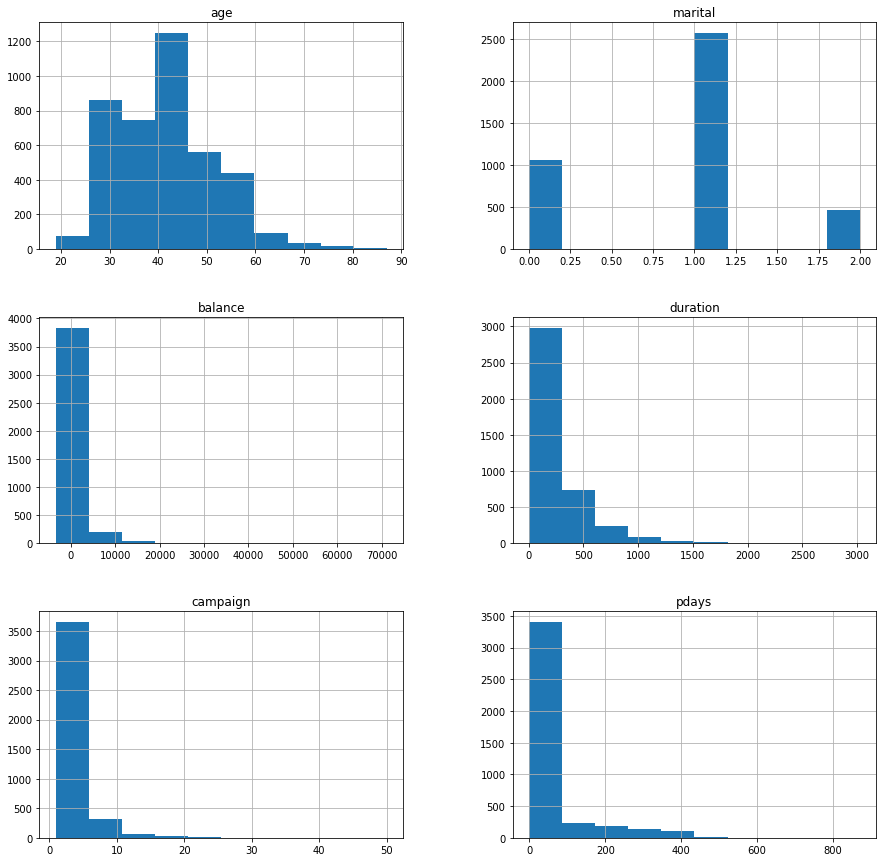

In [20]:
df.hist(figsize = (15, 15))

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        حال با استفاده از تابع 
        $select\_dtypes()$
        تنها ستون‌هایی را انتخاب می‌کنیم که مقادیر عددی دارند و آن‌ها را ذخیره می‌کنیم.
        <br>
        سپس ستون مربوط به marital
        را هم حذف می‌کنیم.
        <br>
        همچنین سطر هایی که مقدار هدف آن‌ها
        yes
        و
        no
        است را به صورت جداگانه برای بخش ۱۰ ذخیره می‌کنیم.
    </b>
</div>

In [21]:
df_yes = df['y'] == 'yes'
df_no = df['y'] == 'no'
df = df.select_dtypes(exclude = ['object'])
del df['marital']

nan_df = nan_df.select_dtypes(exclude = ['object'])
del nan_df['marital']

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
      بخش 9
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        برای محاسبه ی انحراف معیار از تابع
        $std()$
        استفاده می‌کنیم.
    </b>
</div>


In [22]:
df = (df - df.mean())/df.std()
df

,age,balance,duration,campaign,pdays
0,-1.154366,0.255388,-0.724620,-0.573012,-0.404051
1,-0.856422,1.406374,-0.005131,-0.573012,3.031432
2,-0.000582,-0.378000,-0.313979,-0.573012,2.940492
3,-1.154366,0.136148,-0.259744,0.380660,-0.404051
4,1.725758,0.006078,-0.155147,-0.573012,-0.404051
...,...,...,...,...,...
4516,-0.856422,-0.557434,0.243872,0.698550,-0.404051
4517,1.527129,-1.699986,-0.437946,-0.573012,-0.404051
4518,1.527129,-0.316655,-0.445694,2.605894,-0.404051
4519,-1.352996,0.006173,-0.530922,0.380660,1.738074


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
      بخش 10
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
        تحلیل کلی نمودارها و مفهوم آن‌ها این است که نشان می‌دهد پراکندگی یک ویژگی خاص برای افرادی که سپرده بلندمدت ثبت کرده‌اند یا نکرده اند، چگونه است.
        <br>
        بهترین ویژگی برای تکمیل فیلد هدف ویژگی
        duration
        یا همان مدت زمان آخرین تماس مشتری با بانک است.
        <br>
        دلیل این انتخاب آن است که نمودار 
        pdf
        توزبع نرمال ویژگی های دیگر چه در حالتی که فیلد هدف آن‌ها
        yes
        باشد و چه 
        no
        باشد دارای شکل مشابهی هستند و پیک هر دو در یک ناحیه قرار  دارد بنابراین نمی‌توان نتیجه خاصی بر اساس مقدار این ویژگی برا فیلد هدف به دست اورد.
        مثلا به ازای ویژگی سن اگر سن نرمالایز شده یک فرد 0 باشد هیچ ننیجه ای نمی‌توان گرفت ولی اگر مدت زمان آخرین تلفن نرمالایز شده یک فرد با بانک برابر ۰ باشد می‌توان حدس زد که این فرد با احتمال بالایی سپرده مدت دار ثبت نکرده و اگر این مقدار برابر ۲ باشد می‌توان گفت با توجه به نمودار این فرد به احتمال زیادی سپرده مدت دار ثبت کرده است.
        <br>
        <br>
        <br>
        در کد پایین روی ستون‌ها 
        for
        می‌زنیم و به ازای هر ستون ابتدا میانگین و انحراف معیار آن را به ازای دوحالتی که فرد سپرده مدت دار ثبت کرده است یا نه به دست می‌آوریم و سپس با استفاده از تابع 
        $stats.norm.pdf()$
        تابع چگالی احتمال توزیع آن ویژگی را به ازای هر دو حالت به دست آورده و سپس نمودار آن را رسم می‌کنیم.
    </b>
</div>


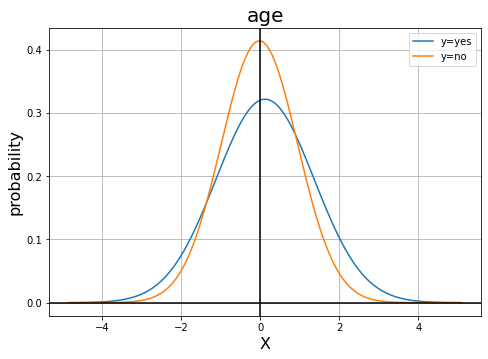

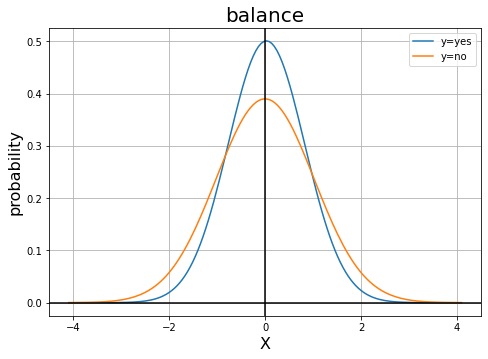

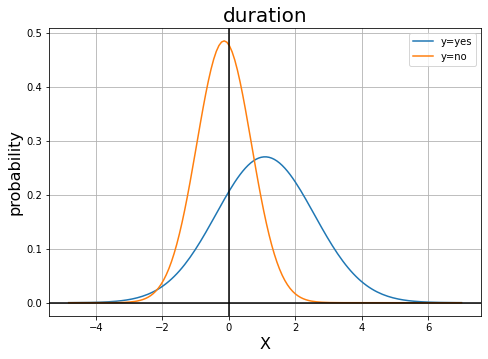

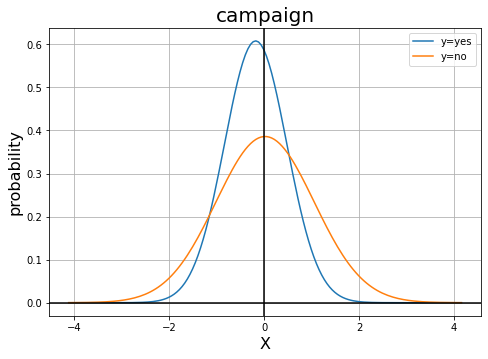

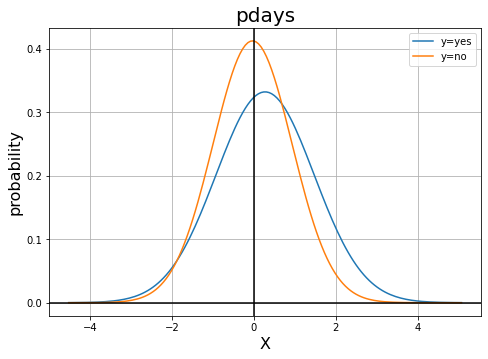

In [23]:
for column in df:
    yes_mean = df[df_yes][column].mean()
    yes_std = df[df_yes][column].std()
    
    no_mean = df[df_no][column].mean()
    no_std = df[df_no][column].std()
    
    x = np.linspace(min(yes_mean - 4 * yes_std, no_mean - 4 * no_std), max(yes_mean + 4 * yes_std, no_mean + 4 * no_std), 150)
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.plot(x, stats.norm.pdf(x, yes_mean, yes_std), label = 'y=yes')
    ax.plot(x, stats.norm.pdf(x, no_mean, no_std), label = 'y=no')
    
    ax.grid(True, which = 'both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    ax.set_xlabel("X", fontsize = 16)
    ax.set_ylabel("probability", fontsize = 16)
    ax.set_title(column, fontsize = 20)
    

    fig.legend(bbox_to_anchor = (1, 1))


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: blue">
    <b>
        بخش 11
    </b>
</div>
<br>
<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
         در اینجا ابتدا تقاطع میان دو منحنی را به دست می‌آوریم که دو نقطه با طول ۰.۷۶۸ و ۲.۱۵- هستند.
        اگر مدت زمان تلفن نرمالایز شده یک فرد میان این دو نقطه باشد او احتمال سپرده مدت دار ثبت نکرده و در غیر این صورت احتمالا ثبت کرده است.
    </b>
</div>

In [24]:
yes_mean = df[df_yes]['duration'].mean()
yes_std = df[df_yes]['duration'].std()

no_mean = df[df_no]['duration'].mean()
no_std = df[df_no]['duration'].std()

def get_intersection_location(mean1, mean2, std1, std2):
    alpha = 1/(2*std1**2) - 1/(2*std2**2)
    theta = mean1**2 /(2*std1**2) - mean2**2 / (2*std2**2) - np.log(std2/std1)
    beta = mean2/(std2**2) - mean1/(std1**2)
    return np.roots([alpha, beta, theta])

intersections = get_intersection_location(yes_mean, no_mean, yes_std, no_std)
intersections

array([-2.15725556,  0.76813385])

<div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
         حال ابتدا دیتافریم 
        test
        را که میخواهیم ستون هدف آن را کامل کنیم، نرمالایز می‌کنیم و سپس ستون هدف را به ازای تمام سطرها برابر 
        yes
        می‌کنیم و سپس سطر هایی که مدت زمان تلفن آن‌ها میان دو تقاطع است را به 
        no
        تغییر می‌دهیم.
        <br>
        توجه کنید در فایل
        result.csv
        ستون standard
        در واقع همان اندیس اولیه سطر ها است.
    </b>
</div>

In [25]:
nan_df = (nan_df - nan_df.mean())/nan_df.std()
nan_df['y'] = 'yes'

nan_df.loc[(nan_df['duration'] < intersections[0]) | (nan_df['duration'] > intersections[1]), 'y'] = 'no'
nan_df.to_csv('result.csv')
nan_df

,age,balance,duration,campaign,pdays,y
34,0.760234,-0.018968,0.410199,0.105558,-0.436283,yes
38,-0.875188,0.984671,2.067139,-0.621620,2.674752,no
54,0.005637,0.351263,0.079617,0.105558,-0.436283,yes
65,0.964661,-0.469491,-0.476728,-0.621620,1.114699,yes
89,0.005637,0.202576,-0.198556,-0.258031,-0.436283,yes
...,...,...,...,...,...,...
4470,-1.079616,-0.044617,-0.182430,-0.621620,-0.436283,yes
4471,1.782372,0.835612,-0.146146,0.469147,-0.436283,yes
4473,-0.875188,-0.299987,-0.464634,-0.621620,2.039847,yes
4477,-0.977402,-0.263559,-0.609767,-0.258031,-0.436283,yes


<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: green;">
    <b>
    نتیجه گیری کلی:
    </b>
    </div>
    <br>
    </div>
    <div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
       راه های گوناگونی برای پر کردن فیلد های 
        NaN
        یک دیتاست وچود دارد که برخی از آن‌ها مانند جایگذاری آن‌ها با میانگین یا مود ستون خود بسیار سریع و کم هزینه هستند ولی معایبی مانند کم شدن دقت را دارند، در 
        صورتی که در برخی راه ها با داشتن دیتای کامل و به اندازه کافی بزرگ می‌توان یک تابع تخمینگر 
        ایجاد کرد و مقادیر 
        NaN
        را با دادن ویژگی های موجود به عنوان ورودی به این تابع و دریافت یک مقدار خروجی از تابع به عنوان مقدار هدف و با خطای کمتر جایگزین کرد و دیتاست را کامل کرد.
    </b>
</div>

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: green;">
    <b>
    ارائه راهکار برای توسعه و بهبود پروژه:
    </b>
    </div>
    <br>
    </div>
    <div dir = "rtl" style = "font-size: 16px; font-family: Calibri;">
    <b>
       به نظر من بهتر بود کمی بیشتر داخل صورت پروژه راهنمایی می‌شد که از چه توابعی استفاده کنیم و یا لینک های کمکی جزیی تری داده میشد.
    </b>
</div>

<div dir = "rtl" style = "font-size: 20px; font-family: Calibri; color: green;">
    <b>
    منابع:
    </b>
    </div>
    <br>
    </div>
    <div style = "font-size: 16px; font-family: Calibri;">
    <b>
      https://stackoverflow.com/
        <br>
        https://www.geeksforgeeks.org/
    </b>
</div>